## Normalization

In [2]:
import re
import json

def load_normalization_dict(filename):
    try:
        with open(filename, "r", encoding="utf-8") as file:
            raw_dict = json.load(file)
        
        processed_dict = {}
        for key, value in raw_dict.items():
            key_lower = key.lower()
            value_lower = value.lower()
            if key_lower not in processed_dict:
                processed_dict[key_lower] = value_lower
        
        return processed_dict
    except json.JSONDecodeError:
        print("Error: Unable to decode JSON. Please check the file format.")
        return {}
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return {}

# Load dictionary
normalization_dict = load_normalization_dict("C:/Users/user/Desktop/Files/University/NLP/A2/dict.json")

In [3]:
normalization_dict

{'mei': 'main',
 'mai': 'main',
 'main': 'main',
 'kya': 'kya',
 'kia': 'karna',
 'kiya': 'kar',
 'mujhe': 'mujhe',
 'mujhay': 'mujhe',
 'mujhy': 'mujhe',
 'uthna': 'uthna',
 'uthay': 'uthna',
 'utha': 'uthna',
 'nashta': 'nashta',
 'nashtay': 'nashta',
 'bjay': 'baje',
 'baje': 'baje',
 'nikla': 'nikalna',
 'niklay': 'nikalna',
 'niklaa': 'nikalna',
 'niklayga': 'niklega',
 'poncha': 'pohcha',
 'pohunch': 'pohcha',
 'pohanch': 'pohcha',
 'chal': 'chala',
 'chala': 'chala',
 'chalay': 'chala',
 'aya': 'aaya',
 'aaya': 'aaya',
 'aai': 'aayi',
 'gaya': 'gaya',
 'gai': 'gayi',
 'gaye': 'gaye',
 'betha': 'baitha',
 'bethay': 'baitha',
 'bethayga': 'baithayga',
 'parhna': 'parhna',
 'parhi': 'parhna',
 'parh': 'parhna',
 'parhayi': 'parhna',
 'parhay': 'parhna',
 'parhny': 'parhna',
 'acha': 'achha',
 'accha': 'achha',
 'bohot': 'bahut',
 'boht': 'bahut',
 'kaafi': 'kaafi',
 'thoda': 'thoda',
 'thori': 'thodi',
 'thoriya': 'thodi',
 'masla': 'masla',
 'maslay': 'masla',
 'masle': 'masla',
 

In [4]:
import json
import re

### Data preprocessing

In [5]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove unnecessary punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'\t+', ' ', text).strip()  # Remove tabs
    text = re.sub(r'^\d+\s*', '', text)  # Remove numbering at start
    text = re.sub(r'\n+', ' ', text).strip()  # Remove extra line breaks
    return text

### Load dataset

In [6]:
import os

def load_data(folder_path):
    count=0
    dict_data={}
    
    for filename in os.listdir(folder_path):
        all_lines = []
        count+=1
        print(f"{count}, {filename}" )
        
        parts = filename.split("_")  # Split by "_"
        day_string = parts[1].split(".")[0]  # Extract "Day11" part
        
        if filename.endswith(".txt"):
            line_of_diary=[]
            filepath = os.path.join(folder_path, filename)
            
            with open(filepath, 'r', encoding='utf-8') as file:
                for line in file:
                    processed_line = preprocess_text(line.strip())
                    words = processed_line.split()
                    normalized_words = [normalization_dict.get(word, word) for word in words]
                    line= " ".join(normalized_words)
                    
                    if line:
                        all_lines.append(line.strip())
            
            if day_string in dict_data:
                dict_data[day_string].append(all_lines)  # Append to existing list
            else:
                dict_data[day_string] = [all_lines]  # Create a new key with the list

                    
    return dict_data

folder_path = "C:/Users/user/Desktop/Files/University/NLP/A2/dataset"
data = load_data(folder_path)

# print(data[:5])

1, 100_Day11.txt
2, 104_Day11.txt
3, 125_Day1.txt
4, 125_Day14.txt
5, 135_Day11.txt
6, 158_Day3.txt
7, 158_Day7.txt
8, 158_Day8.txt
9, 164_Day11.txt
10, 165_Day14.txt
11, 165_Day8.txt
12, 173_Day2.txt
13, 188_Day8.txt
14, 191_Day13.txt
15, 191_Day4.txt
16, 197_Day4.txt
17, 199_Day5.txt
18, 200_Day7.txt
19, 201_Day8.txt
20, 208_Day3.txt
21, 211_Day8.txt
22, 213_Day4.txt
23, 214_Day12.txt
24, 223_Day14.txt
25, 223_Day8.txt
26, 224_Day14.txt
27, 224_Day3.txt
28, 225_Day2.txt
29, 228_Day1.txt
30, 229_Day7.txt
31, 230_Day11.txt
32, 240_Day10.txt
33, 245_Day1.txt
34, 245_Day8.txt
35, 250_Day5.txt
36, 250_Day9.txt
37, 257_Day12.txt
38, 257_Day4.txt
39, 274_Day2.txt
40, 280_Day13.txt
41, 285_Day4.txt
42, 285_Day7.txt
43, 290_Day4.txt
44, 291_Day1.txt
45, 304_Day9.txt
46, 311_Day5.txt
47, 311_Day6.txt
48, 331_Day10.txt
49, 336_Day12.txt
50, 337_Day3.txt
51, 343_Day13.txt
52, 344_Day13.txt
53, 350_Day7.txt
54, 356_Day9.txt
55, 360_Day7.txt
56, 360_Day9.txt
57, 363_Day13.txt
58, 366_Day4.txt
59, 

In [7]:
len(data["Day1"])

8

In [8]:
data["Day13"]

[['aaj sunday tha isliye subah der tak soya uthne ke baad fresh huwa thodi der mobile use kar aur bed par relax kar',
  'ghar walon ke saath late nashta kar jo kaafi mazedar tha nashta ke baad thodi der tv dekh aur halka sa gossip kar',
  'nashta ke baad thodi der araam kar phir kuch waqt apne personal projects aur hobbies ko diya thodi research karna aur naye ideas explore kiye',
  'dupahar ko ghar walon ke saath lunch kar aur maze karna gupshup hui uske baad halka sa rest kar aur social media scroll kar',
  'shaam ko family ke saath bahar ghoomne ka plan bana shopping mall aur ek achha cafe visit kar kaafi achha waqt guzara',
  'wapsi par thoda fresh feel ho raha tha isliye halka sa evening walk kar saath hi kuch personal cheezein plan karna aur future goals ko sochna',
  'phir ghar aakar university ka kaam kar jo thoda pending tha assignments complete kiye aur upcoming tasks review kiye',
  'raat ka khana family ke saath milkar kar khane ke baad sab log ikatthe baithe aur halkaphulk

### Data Labeling

In [9]:
from dotenv import load_dotenv
import os

load_dotenv()

hf_token= os.getenv("HF_TOKEN")

In [13]:
from huggingface_hub import InferenceClient

os.environ["HF_TOKEN"]= hf_token

client = InferenceClient("meta-llama/Llama-3.2-3B-Instruct")

In [14]:
# pip install groq

In [15]:
os.environ["GROQ_API_KEY"] = os.getenv('GROQ_API')
from groq import Groq

client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="llama-3.3-70b-versatile",
    stream=False,
)

print(chat_completion.choices[0].message.content)

Fast language models are crucial in the field of natural language processing (NLP) due to their ability to swiftly generate human-like text, summarize content, answer questions, and translate languages. Here are the key reasons why fast language models are important:

1. **Improved Efficiency**: Fast language models can process and analyze vast amounts of text data quickly, making them ideal for applications that require real-time processing, such as:
	* Live chatbots and customer support systems
	* Real-time language translation
	* Text summarization and news feeds
2. **Enhanced User Experience**: Fast language models can generate responses quickly, allowing users to interact with applications in a seamless and natural way. This is particularly important in applications where users expect immediate responses, such as:
	* Virtual assistants (e.g., Siri, Alexa, Google Assistant)
	* Chatbots and conversational interfaces
3. **Increased Productivity**: Fast language models can automate ta

In [22]:
system_prompt=""""You are an expert in sentiment analysis of Roman Urdu text.  
I will provide you with sentences in Roman Urdu, and you should analyze their sentiment as **positive, negative, or neutral** based on the emotions conveyed in the text.  

For each input, follow this structured approach:  
1. **Think**: Understand the meaning of the sentence and determine the sentiment based on context.  
2. **Output**: Provide the sentiment as one of the three categories: **positive, negative, or neutral**.  

### Examples:  

#### **Positive Example**  
**Input:** aj mera result tha, ma exam ma pass ho gaya.  
**Thinking:** The user is happy as they have passed the exam, indicating a positive sentiment.  
**Output:** positive  

#### **Negative Example**  
**Input:** aj mera result tha, ma exam ma fail ho gaya.  
**Thinking:** The user is sad because they have failed the exam, indicating a negative sentiment.  
**Output:** negative  

#### **Neutral Example**  
**Input:** aj mera result tha, ma result dekhne gaya.  
**Thinking:** The sentence is factual and does not express any strong emotions, so the sentiment is neutral.  
**Output:** neutral  

The model should not output the thinking step. The ouput of of model should have only these three words ['negative', 'positive','neutral']
"""

In [23]:
output= client.chat.completions.create(
    messages=[
        {"role": "system", "content": system_prompt},
        {'role': 'user', 'content': 'ma ghar aya to mein bemar hogia'}
    ],
    stream=False,
    model="llama-3.3-70b-versatile",
    max_tokens= 15,
    )

In [24]:
print(output.choices[0].message.content)

negative


In [25]:
labeled_data={}

In [30]:
# for sentence in normalized_data:
#     output= client.chat.completions.create(
#         messages=[
#             {"role": "system", "content": system_prompt},
#             {'role': 'user', 'content': sentence}
#         ],
#         stream=False,
#         max_tokens= 1024,
#     )
    
#     sentiment= output.choices[0].message.content.replace("**Output:** ", "")
#     labeled_data[sentence] = sentiment

# for sentence in normalized_data:
#     output= client.chat.completions.create(
#         messages=[
#             {"role": "system", "content": system_prompt},
#             {'role': 'user', 'content': sentence}
#         ],
#         stream=False,
#         max_tokens= 1024,
#         model="llama-3.3-70b-versatile",
#     )
    
#     sentiment= output.choices[0].message.content
#     labeled_data[sentence] = sentiment

In [28]:
labeled_data

{'subah 5 baje uthna para trip tha jaldi jaldi ready huwa aur 0540 ghar se nikal gaye': 'neutral',
 '0615 bus chala padi jo ke first time tha ke trip time se chala': 'positive',
 'nust ke 3 larkay the unse baat ki phir bluetooth trip coordinator ke pass tha tou hum shor dalte rahay ke song change kar den': 'negative',
 'phir murree mein nashta ke leya uthna phir uske baad bluetooth humain mil gaya': 'positive',
 'mein tou so gaya phir hum jaga par pahunch gaye udhar 3 peaks thin 2 par chadh gaye': 'positive',
 'ek par sahi galat raste se gaye the full steep tha mujhey tou laga mein gaya': 'negative',
 'peak par pahunch gaya phir picks li': 'negative',
 'phir slow wala group bhi aa gaya tha un ke sath dubara picks li': 'negative',
 'wapsi par jeep mein bahut rash tha': 'negative',
 'phir dinner kiya ghar gaye aur so gaya': 'neutral',
 'subah 8 baje uthna fresh huwa nashta kar aur university ke liye tyaar hone laga': 'positive',
 '9 baje apne bike par university ke liye nikal gaya aj fri

In [66]:
with open("data.json", "w") as file:
    json.dump(labeled_data, file, indent=4)

In [10]:
with open("data.json", "r") as file:
    labeled_data = json.load(file)

In [11]:
len(labeled_data)

302

In [12]:
#pip install --upgrade matplotlib scipy pandas

In [13]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_sentiment_trends(data, sentiment_dict):
    sentiment_counts = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})
    
    for day, lists_of_sentences in data.items():
        for sentence_list in lists_of_sentences:
            for sentence in sentence_list:
                sentiment = sentiment_dict.get(sentence, 'neutral')  # Default to neutral if not found
                sentiment_counts[day][sentiment] += 1
    
    return sentiment_counts


In [14]:
def plot_sentiment_trends(sentiment_counts):
    days = sorted(sentiment_counts.keys())
    
    positive_counts = [sentiment_counts[day]['positive'] for day in days]
    negative_counts = [sentiment_counts[day]['negative'] for day in days]
    neutral_counts = [sentiment_counts[day]['neutral'] for day in days]
    
    plt.figure(figsize=(10, 5))
    plt.plot(days, positive_counts, label='Positive', marker='o', color='g')
    plt.plot(days, negative_counts, label='Negative', marker='o', color='r')
    plt.plot(days, neutral_counts, label='Neutral', marker='o', color='b')
    plt.xlabel("Days")
    plt.ylabel("Sentiment Count")
    plt.title("Sentiment Trends Over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


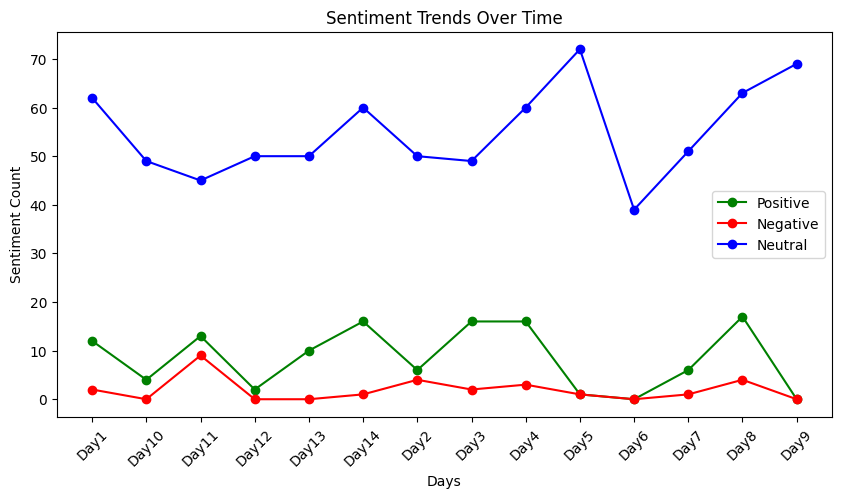

In [15]:
sentiment_counts = analyze_sentiment_trends(data, labeled_data)
plot_sentiment_trends(sentiment_counts)